In [1]:
import pandas as pd

graduation_data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')

graduation_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [43]:
from pygam import LogisticGAM, s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target labels and split dataset into features and target variable
graduation_data['Target'] = LabelEncoder().fit_transform(graduation_data['Target'])

# Ensure the target variable is binary (0 or 1)
if len(graduation_data['Target'].unique()) > 2:
	graduation_data = graduation_data[graduation_data['Target'] <= 1]

X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Standardize features and split the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize a dictionary to store the results
results = {}

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test).round()  # Rounding predictions to match binary classification
results['Linear Regression'] = accuracy_score(y_test, y_pred_lin)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
results['Decision Tree'] = accuracy_score(y_test, y_pred_dt)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
results['Naive Bayes'] = accuracy_score(y_test, y_pred_nb)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
results['Random Forest'] = accuracy_score(y_test, y_pred_rf)

# Support Vector Machine with RBF Kernel
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
results['SVM with RBF Kernel'] = accuracy_score(y_test, y_pred_svm)

# Neural Network Model (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
results['Neural Network'] = accuracy_score(y_test, y_pred_mlp)

# Additive Model (GAM)
gam_clf = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6)).fit(X_train, y_train)
y_pred_gam = gam_clf.predict(X_test)
results['Additive Model (GAM)'] = accuracy_score(y_test, y_pred_gam)

# Display results for all algorithms
results


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Linear Regression': 0.7759398496240602,
 'Decision Tree': 0.7293233082706767,
 'Naive Bayes': 0.7473684210526316,
 'Random Forest': 0.7894736842105263,
 'SVM with RBF Kernel': 0.7729323308270677,
 'Neural Network': 0.7654135338345864,
 'Additive Model (GAM)': 0.6631578947368421}

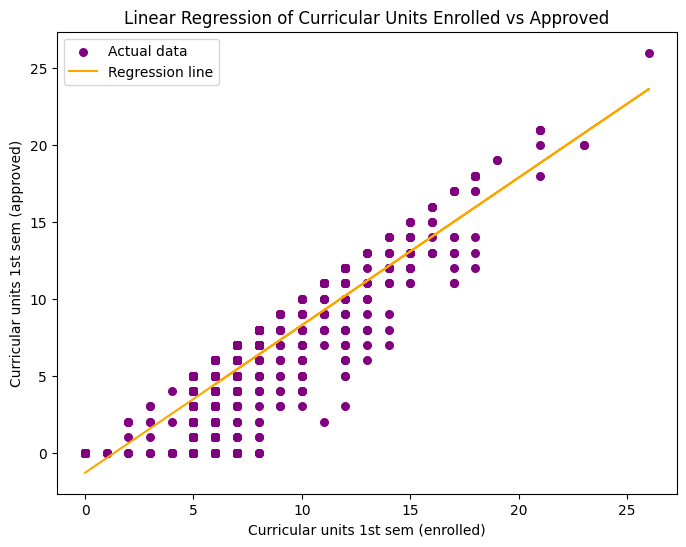

In [8]:
from matplotlib import pyplot as plt
import numpy as np

# Selecting 'Curricular units 1st sem (enrolled)' as the x-axis feature and 'Curricular units 1st sem (approved)' as the y-axis for linear regression.
# Using only these two features for simplicity, as they both represent "Curricular units"

x = graduation_data['Curricular units 1st sem (enrolled)'].values
y = graduation_data['Curricular units 1st sem (approved)'].values

# Estimating coefficients for linear regression
def estimate_coef(x, y):
    # Number of observations
    n = np.size(x)

    # Mean of x and y vectors
    m_x = np.mean(x)
    m_y = np.mean(y)

    # Calculating cross-deviation and deviation about x
    SS_xy = np.sum(y * x) - n * m_y * m_x
    SS_xx = np.sum(x * x) - n * m_x * m_x

    # Calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1 * m_x

    return (b_0, b_1)

# Plotting regression line
def plot_regression_line(x, y, b):
    plt.figure(figsize=(8, 6))
    # Scatter plot of actual points
    plt.scatter(x, y, color="purple", marker="o", s=30, label="Actual data")

    # Predicted response vector
    y_pred = b[0] + b[1] * x

    # Plotting the regression line
    plt.plot(x, y_pred, color="orange", label="Regression line")

    # Adding labels and title
    plt.xlabel('Curricular units 1st sem (enrolled)')
    plt.ylabel('Curricular units 1st sem (approved)')
    plt.title('Linear Regression of Curricular Units Enrolled vs Approved')
    plt.legend()
    plt.show()

# Estimate coefficients and plot
b = estimate_coef(x, y)
plot_regression_line(x, y, b)


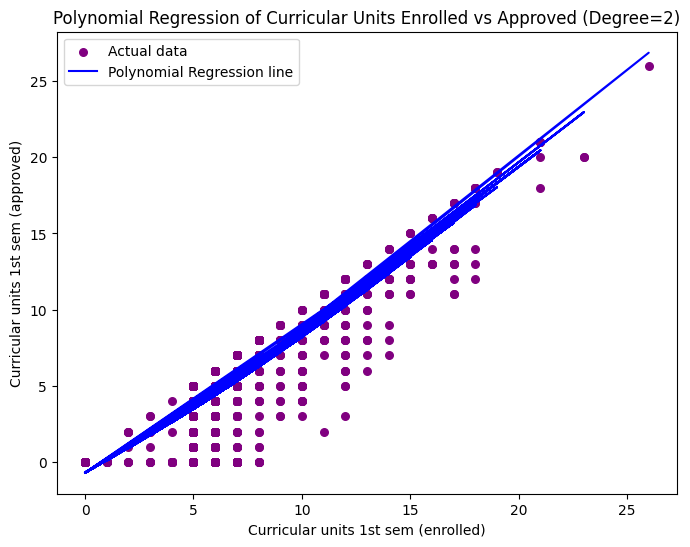

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Reshape x for compatibility with PolynomialFeatures
x_reshaped = x.reshape(-1, 1)

# Polynomial Regression (degree=2 for simplicity)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_reshaped)

# Fit Polynomial Regression Model
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)

# Predict using the polynomial model
y_poly_pred = poly_reg_model.predict(x_poly)

# Plot the original data and the polynomial regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="purple", marker="o", s=30, label="Actual data")
plt.plot(x, y_poly_pred, color="blue", label="Polynomial Regression line")
plt.xlabel('Curricular units 1st sem (enrolled)')
plt.ylabel('Curricular units 1st sem (approved)')
plt.title('Polynomial Regression of Curricular Units Enrolled vs Approved (Degree=2)')
plt.legend()
plt.show()


Linear Regression Coefficients: [0.95884339]
Intercept: -1.3266399992486742
Variance score (R^2) on training data: 0.5802566208537527
Variance score (R^2) on testing data: 0.6077313508038802


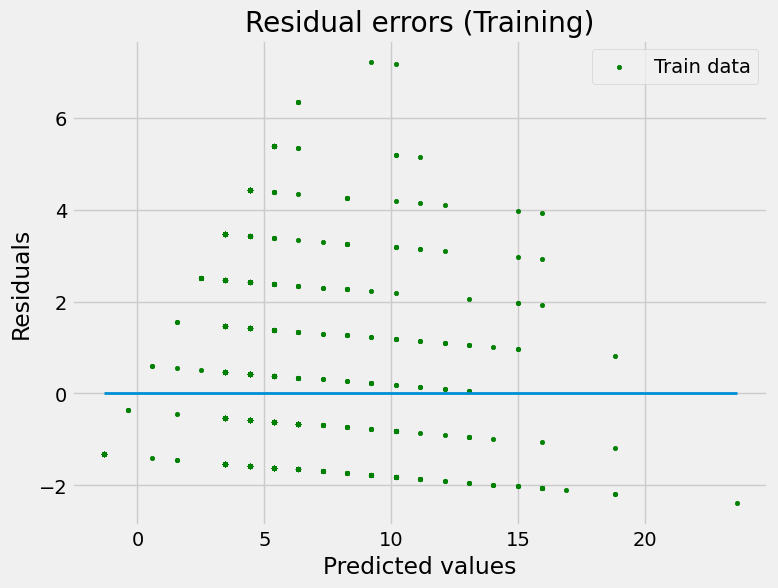

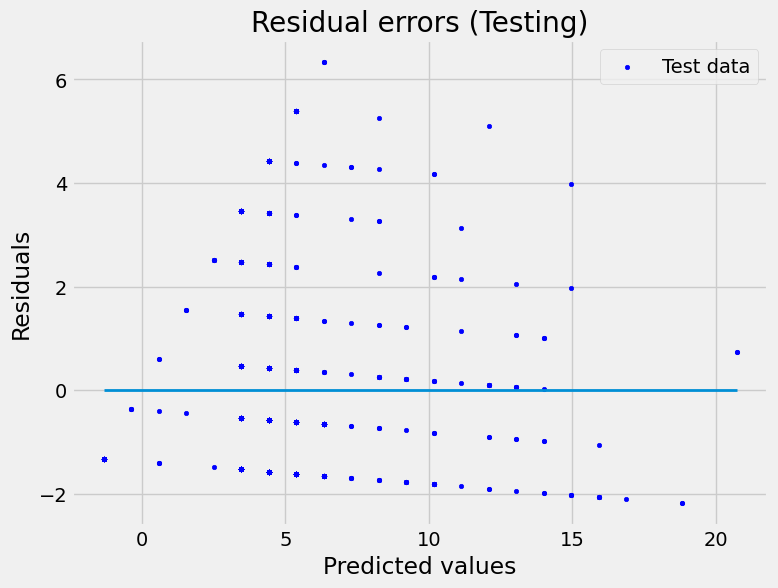

In [10]:
from sklearn.model_selection import train_test_split

# Select features for X and target for y
# Using 'Curricular units 1st sem (enrolled)' and 'Curricular units 1st sem (approved)'
X = graduation_data[['Curricular units 1st sem (enrolled)']].values
y = graduation_data['Curricular units 1st sem (approved)'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate variance score (R^2)
r2_score_train = linear_reg.score(X_train, y_train)
r2_score_test = linear_reg.score(X_test, y_test)

# Display coefficients and R^2 score
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_

print(f"Linear Regression Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Variance score (R^2) on training data: {r2_score_train}")
print(f"Variance score (R^2) on testing data: {r2_score_test}")

# Plotting residual errors for training and testing sets
plt.style.use('fivethirtyeight')

# Training residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, color="green", s=10, label="Train data")
plt.hlines(y=0, xmin=min(y_train_pred), xmax=max(y_train_pred), linewidth=2)
plt.title("Residual errors (Training)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Testing residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, y_test_pred - y_test, color="blue", s=10, label="Test data")
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), linewidth=2)
plt.title("Residual errors (Testing)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend()
plt.show()


Polynomial Degree 2 - R^2 on Training Data: 0.5836293576827458
Polynomial Degree 2 - R^2 on Testing Data: 0.611862003560871
Coefficients for Degree 2: [0.78938191 0.01024516]



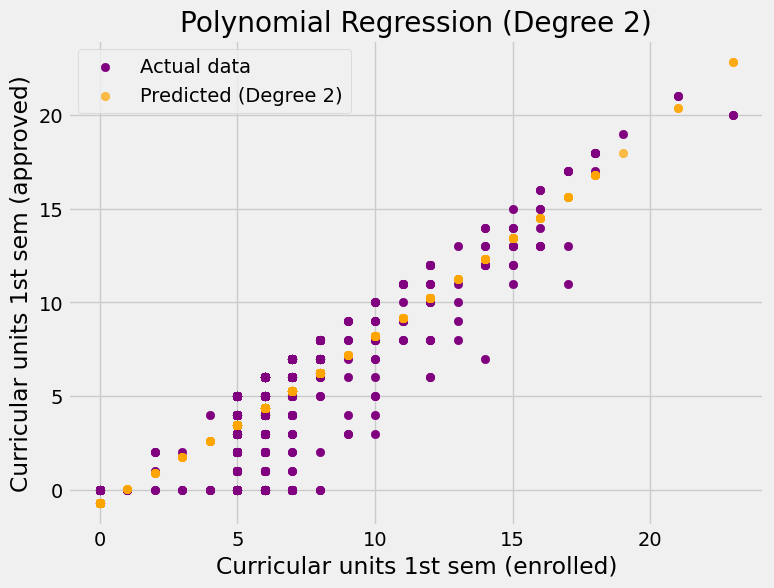

Polynomial Degree 3 - R^2 on Training Data: 0.5856224763846412
Polynomial Degree 3 - R^2 on Testing Data: 0.614781192323117
Coefficients for Degree 3: [ 0.59908536  0.03961008 -0.00111076]



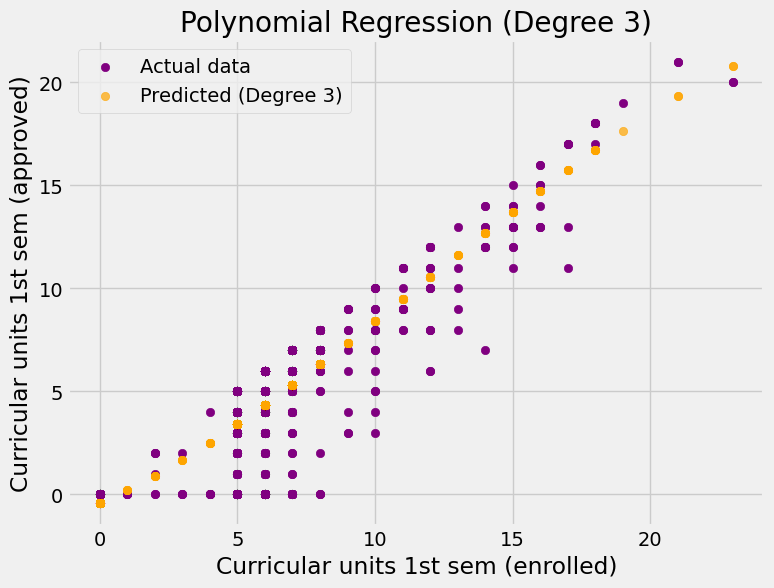

Polynomial Degree 4 - R^2 on Training Data: 0.590945768652968
Polynomial Degree 4 - R^2 on Testing Data: 0.6176670609456154
Coefficients for Degree 4: [ 0.06544907  0.17624336 -0.01194421  0.00025918]



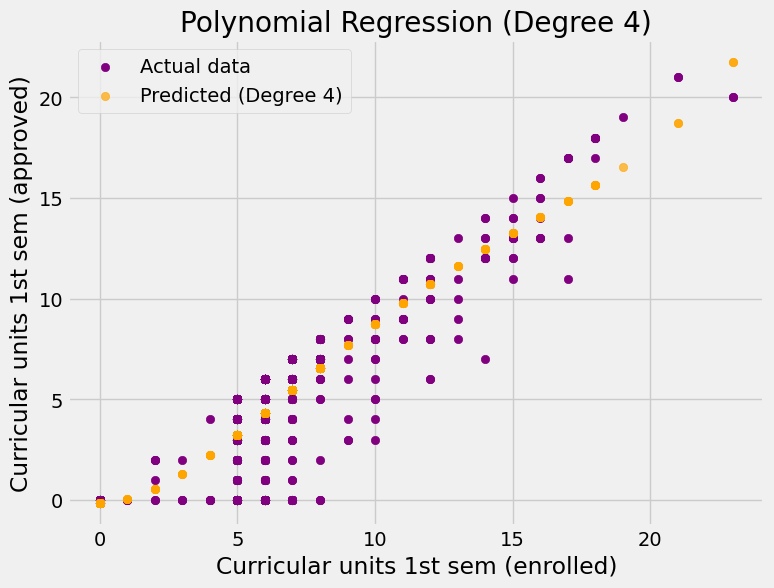

In [11]:
# Function to fit polynomial regression and plot results
def polynomial_regression(degree):
    # Transform features for polynomial regression
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Fit linear regression on polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)

    # Predict on training and testing sets
    y_poly_train_pred = poly_model.predict(X_poly_train)
    y_poly_test_pred = poly_model.predict(X_poly_test)

    # Calculate R^2 score for training and testing sets
    r2_train = poly_model.score(X_poly_train, y_train)
    r2_test = poly_model.score(X_poly_test, y_test)

    # Print R^2 score and coefficients
    print(f"Polynomial Degree {degree} - R^2 on Training Data: {r2_train}")
    print(f"Polynomial Degree {degree} - R^2 on Testing Data: {r2_test}")
    print(f"Coefficients for Degree {degree}: {poly_model.coef_}\n")

    # Plot predictions for testing data
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='purple', label='Actual data')
    plt.scatter(X_test, y_poly_test_pred, color='orange', label=f'Predicted (Degree {degree})', alpha=0.7)
    plt.xlabel('Curricular units 1st sem (enrolled)')
    plt.ylabel('Curricular units 1st sem (approved)')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

# Testing polynomial regression for degrees 2, 3, and 4
for d in [2, 3, 4]:
    polynomial_regression(degree=d)


In [17]:
# Redefining X_classification and y_classification
# Assuming 'Target' column is the binary outcome indicating graduation status
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


X_classification = graduation_data.drop(columns=['Target'])
y_classification = graduation_data['Target']

# Scaling features to improve convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_classification)

# Split the scaled dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=23)

# Re-train logistic regression with increased max_iter
log_reg = LogisticRegression(max_iter=2000, random_state=0)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100

# Display results
print(f"Logistic Regression model accuracy (in %): {accuracy:.2f}")
print(f"Logistic Regression model F1-score (in %): {f1:.2f}")


Logistic Regression model accuracy (in %): 78.42
Logistic Regression model F1-score (in %): 77.20


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Define features and target variable
# Using all columns except 'Target' as features, and 'Target' as the label
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(random_state=1)

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Decision Tree Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Decision Tree Classifier F1 Score: {f1 * 100:.2f}%")


Decision Tree Classifier Accuracy: 68.83%
Decision Tree Classifier F1 Score: 69.13%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from scipy.stats import randint

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Random Forest Classifier object
rf = RandomForestClassifier(random_state=1)

# Train the Random Forest Classifier
rf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = rf.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")
print(f"Random Forest Classifier F1 Score: {f1 * 100:.2f}%")

# Randomized Search for hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)
}
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, random_state=1)
rand_search.fit(X_train, y_train)

# Best hyperparameters
best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print("\nBest hyperparameters:", best_params)




Random Forest Classifier Accuracy: 77.85%
Random Forest Classifier F1 Score: 76.12%

Best hyperparameters: {'max_depth': 13, 'n_estimators': 122}


Actual Value: Graduate
Predicted Value: Graduate

Accuracy: 70.0
F1 Score: 68.69467746000961


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


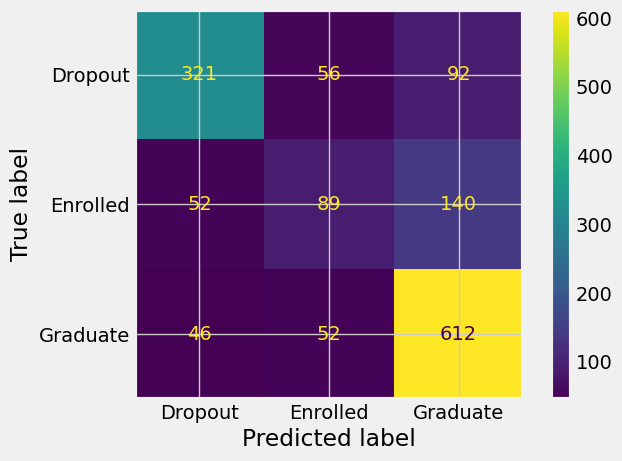

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the graduation dataset
graduation_data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# Initialize Gaussian Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Predict a single output (for demonstration)
single_prediction = model.predict([X_test.iloc[6]])  # Predicting for the 6th item in X_test
print("Actual Value:", y_test.iloc[6])
print("Predicted Value:", single_prediction[0])

# Predict on the full test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAccuracy:", accuracy * 100)
print("F1 Score:", f1 * 100)

# Create and plot confusion matrix with string labels directly from y_test
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [35]:
from sklearn.svm import SVC

# Define features and target variable
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

# Function to train and evaluate SVM with different kernels
def evaluate_svm_kernel(kernel_type, degree=None):
    if kernel_type == 'poly':
        model = SVC(kernel=kernel_type, degree=degree, C=1.0, random_state=125)
    else:
        model = SVC(kernel=kernel_type, C=1.0, random_state=125)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nSVM with {kernel_type} kernel (degree={degree} if polynomial):")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")

# Evaluate SVM with different kernels
evaluate_svm_kernel('linear')
evaluate_svm_kernel('poly', degree=3)
evaluate_svm_kernel('rbf')
evaluate_svm_kernel('sigmoid')



SVM with linear kernel (degree=None if polynomial):
Accuracy: 77.51%
F1 Score: 76.36%

SVM with poly kernel (degree=3 if polynomial):
Accuracy: 74.46%
F1 Score: 72.74%

SVM with rbf kernel (degree=None if polynomial):
Accuracy: 73.67%
F1 Score: 71.62%

SVM with sigmoid kernel (degree=None if polynomial):
Accuracy: 51.75%
F1 Score: 47.06%


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

# Load the graduation dataset
graduation_data = pd.read_csv('../../data/student-graduation/graduation_dataset.csv')
X = graduation_data.drop(columns=['Target'])
y = graduation_data['Target']

# Scale features for neural network training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled dataset into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=125)

# Define the neural network model (MLP) with one hidden layer of 100 neurons
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=125)

# Train the neural network
mlp.fit(X_train_nn, y_train_nn)

# Predict on the test set
y_pred_nn = mlp.predict(X_test_nn)

# Calculate accuracy and F1-score
accuracy_nn = metrics.accuracy_score(y_test_nn, y_pred_nn)
f1_nn = metrics.f1_score(y_test_nn, y_pred_nn, average='weighted')

print(f"Neural Network Accuracy: {accuracy_nn * 100:.2f}%")
print(f"Neural Network F1 Score: {f1_nn * 100:.2f}%")


Neural Network Accuracy: 73.33%
Neural Network F1 Score: 72.73%


c:\Users\sep_j\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
